In [67]:
import pandas as pd
import numpy as np

In [68]:
df  = pd.read_csv('AQI.csv')
print(df)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [70]:
# Q.1) How many instances and columns are available in the data?
instances, columns = df.shape
print(f"Number of instances: {instances}")
print(f"Number of columns: {columns}")

Number of instances: 29531
Number of columns: 16


In [71]:
# Q.2) Which pollutants have NULL values?
null_columns = df.columns[df.isnull().any()]
print("Pollutants with NULL values:", null_columns)

Pollutants with NULL values: Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')


In [72]:
# Q.3) Drop the 2 pollutant columns that have maximum NULL values
# Find the 2 columns with maximum NULL values
columns_to_drop = df.isnull().sum().nlargest(2).index
# Drop the columns
print(columns_to_drop)
df = df.drop(columns=columns_to_drop)
print(df)

Index(['Xylene', 'PM10'], dtype='object')
                City        Date  PM2.5     NO    NO2    NOx    NH3     CO  \
0          Ahmedabad  2015-01-01    NaN   0.92  18.22  17.15    NaN   0.92   
1          Ahmedabad  2015-01-02    NaN   0.97  15.69  16.46    NaN   0.97   
2          Ahmedabad  2015-01-03    NaN  17.40  19.30  29.70    NaN  17.40   
3          Ahmedabad  2015-01-04    NaN   1.70  18.48  17.97    NaN   1.70   
4          Ahmedabad  2015-01-05    NaN  22.10  21.42  37.76    NaN  22.10   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02   7.68  25.06  19.54  12.47   0.47   
29527  Visakhapatnam  2020-06-28  24.38   3.42  26.06  16.53  11.99   0.52   
29528  Visakhapatnam  2020-06-29  22.91   3.45  29.53  18.33  10.71   0.48   
29529  Visakhapatnam  2020-06-30  16.64   4.05  29.26  18.80  10.03   0.52   
29530  Visakhapatnam  2020-07-01  15.00   0.40  26.85  14.05   5.20   0.59   

         SO2      O3 

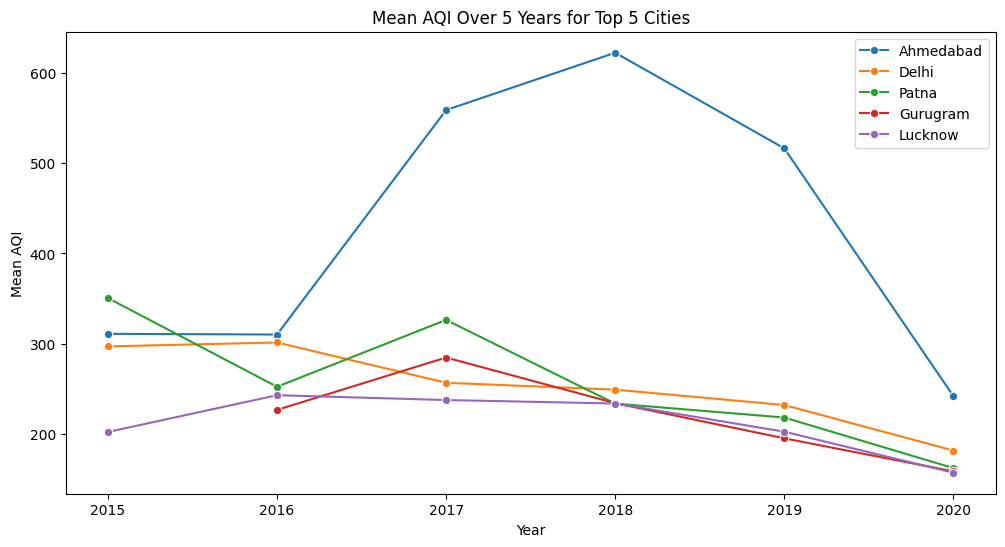

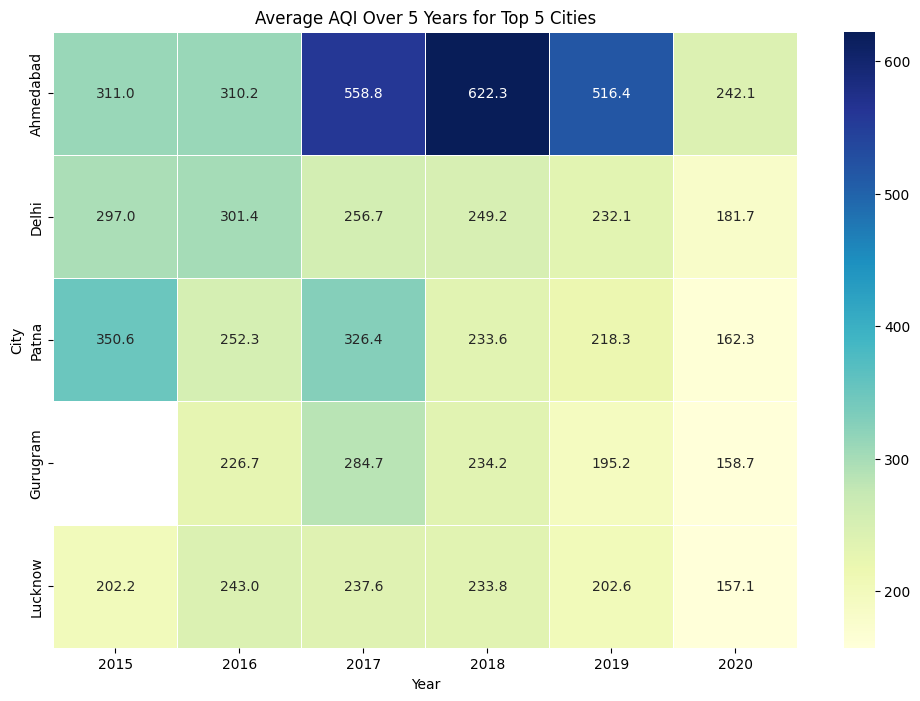

In [73]:
# Q.4) Identify the top 5 cities which have maximum AQI. Plot the average AQI over the 5 years for them.
import seaborn as sns
df['year'] = pd.DatetimeIndex(df['Date']).year
# Calculate annual mean AQI for each city
annual_mean_aqi = df.groupby(['City', 'year'])['AQI'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Iterate over top cities
for city in top_cities:
    city_data = annual_mean_aqi[annual_mean_aqi['City'] == city]
    
    # Plot the mean AQI for each year
    sns.lineplot(x='year', y='AQI', data=city_data, label=city, marker='o')

plt.title('Mean AQI Over 5 Years for Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('Mean AQI')
plt.legend()
plt.show()

# using heatmap
# Create a pivot table with 'City' as rows, 'year' as columns, and 'AQI' as values
pivot_table = df.pivot_table(index='City', columns='year', values='AQI', aggfunc='mean')

# Select the top 5 cities
top_cities_pivot = pivot_table.loc[top_cities]

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_cities_pivot, annot=True, cmap='YlGnBu', fmt=".1f", linewidths=.5)
plt.title('Average AQI Over 5 Years for Top 5 Cities')
plt.xlabel('Year')
plt.ylabel('City')
plt.show()

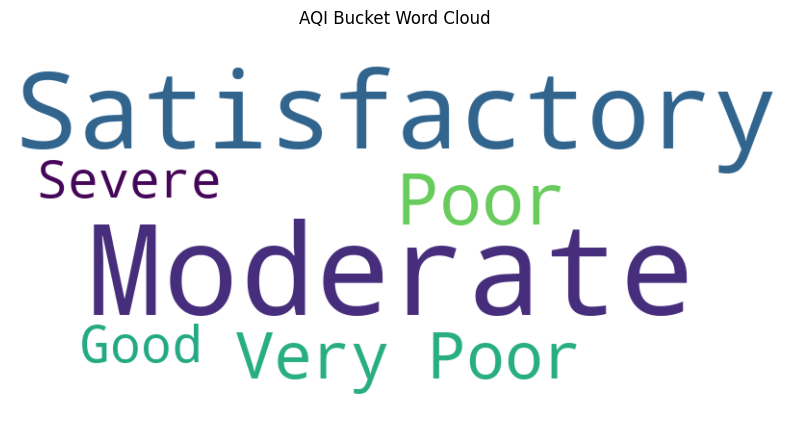

In [74]:
# Q.5) Analyse the AQI_Bucket, identify the frequency for each level. Make a word cloud (optional)
from wordcloud import WordCloud

# Frequency of each AQI Bucket level
bucket_frequency = df['AQI_Bucket'].value_counts()

# Plotting bar chart
sns.barplot(x=bucket_frequency.index, y=bucket_frequency.values)
plt.title('Frequency of AQI Bucket Levels')
plt.xlabel('AQI Bucket')
plt.ylabel('Frequency')
plt.show()

# Optional: Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bucket_frequency)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('AQI Bucket Word Cloud')
plt.show()

In [75]:
# Q.6) Include columns for Month and Year using the following code
# df['year'] = pd.DatetimeIndex(df['Date']).year
# df['month'] = pd.DatetimeIndex(df['Date']).month
# For any two cities of your choice, identify the month that has the highest value of AQI over the year
import calendar
df['month'] = pd.DatetimeIndex(df['Date']).month
# Convert month number to month name
df['month_name'] = df['month'].apply(lambda x: calendar.month_name[x])

city1 = 'Ahmedabad'
city2 = 'Delhi'

max_aqi_month_city1 = df[df['City'] == city1].groupby('year')['AQI'].idxmax()
max_aqi_month_city2 = df[df['City'] == city2].groupby('year')['AQI'].idxmax()
print(max_aqi_month_city1)
print(f"{city1}: {df.loc[max_aqi_month_city1, ['year','month_name', 'AQI']]}")
print(f"{city2}: {df.loc[max_aqi_month_city2, ['year','month_name', 'AQI']]}")

year
2015      53
2016     560
2017    1048
2018    1145
2019    1463
2020    1875
Name: AQI, dtype: int64
Ahmedabad:       year month_name     AQI
53    2015   February  1247.0
560   2016       July  1842.0
1048  2017   November  1747.0
1145  2018   February  2049.0
1463  2019    January  1719.0
1875  2020   February  1291.0
Delhi:        year month_name    AQI
10539  2015   November  483.0
10905  2016   November  716.0
11272  2017   November  677.0
11490  2018       June  593.0
11996  2019   November  659.0
12055  2020    January  492.0


In [77]:
# to know which columns are having pollutants
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  AQI         24850 non-null  float64
 13  AQI_Bucket  24850 non-null  object 
 14  year        29531 non-null  int32  
 15  month       29531 non-null  int32  
 16  month_name  29531 non-null  object 
dtypes: float64(11), int32(2), object(4)
memory usage: 3.6+ MB


In [78]:
# Q.7) Using the correlation coefficient, identify the 3 major pollutants causing bad air quality.
# Select only pollutant columns for correlation matrix
pollutant_columns = df.iloc[:, 2:13]

# Calculate the correlation matrix
correlation_matrix = pollutant_columns.corr()

# Select the top 3 major pollutants causing bad air quality
major_pollutants = correlation_matrix['AQI'][:-1].abs().nlargest(3).index

print("Top 3 major pollutants causing bad air quality:")
print(major_pollutants)

Top 3 major pollutants causing bad air quality:
Index(['CO', 'PM2.5', 'NO2'], dtype='object')


['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']


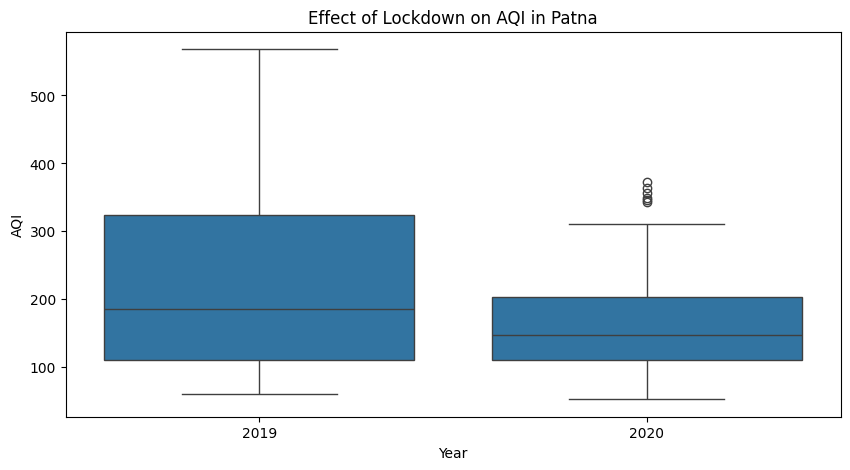

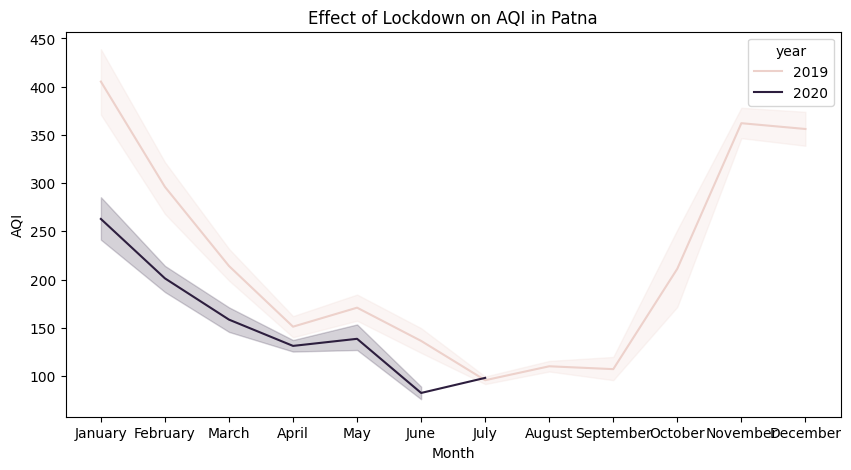

In [79]:
# Q.8) Choose the city that is nearest to your hometown (mention your hometown). 
# Analyse the effect of lockdown on AQI using data for only 2019 and 2020. Use a suitable graph to show the difference.
# My hometown is 'Chhapra Saran, Bihar' So the nearby city is Patna
print(df['City'].unique())
hometown = 'Patna'
# Filter data for 2019 and 2020
lockdown_data = df[df['year'].isin([2019, 2020]) & (df['City'] == hometown)]

# Plotting the difference in AQI between 2019 and 2020
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='AQI', data=lockdown_data)
plt.title(f'Effect of Lockdown on AQI in {hometown}')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.show()
# Line plot to show the trend in AQI over 2019 and 2020
plt.figure(figsize=(10, 5))
sns.lineplot(x='month_name', y='AQI', data=lockdown_data, hue='year')
plt.title(f'Effect of Lockdown on AQI in {hometown}')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()